# IMPORTING PACKAGES 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# THIS DATA HAS TWO PREDICTIONS TO BE MADE ONE IS REGRESSION AND OTHER ONE IS CLASSIFICATION 

df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.tail() # CHEKING THE LAS TFIVE ROWS 

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape # CHECKING THE SHAPE 

(908, 25)

In [6]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

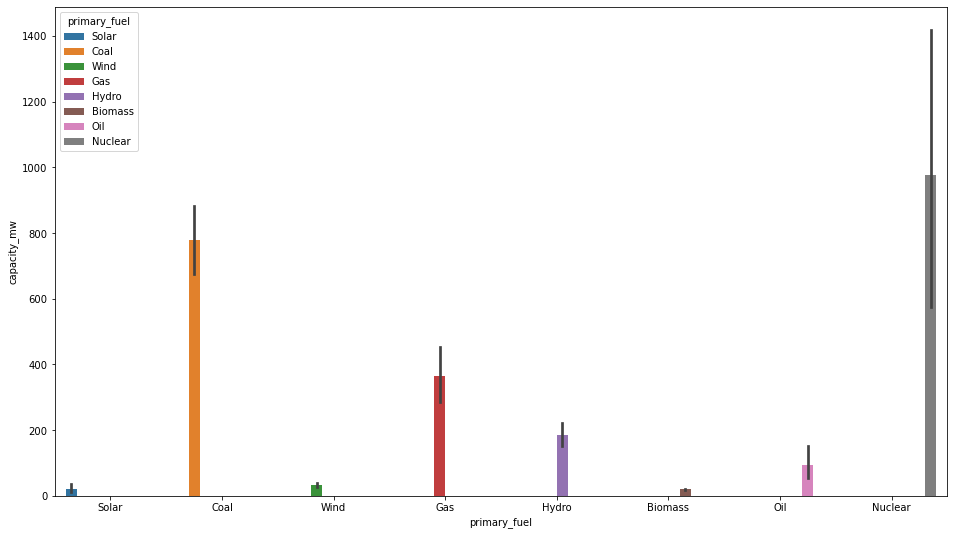

In [7]:
# MAKING THE BAR PLOT 
plt.figure(figsize=(16,9))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df,hue='primary_fuel')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [9]:
df.isna().sum()  # DATA HAS NULL VALUES 

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [10]:
#droping these columns as these are full of NaN values

df.drop(['estimated_generation_gwh','other_fuel3','other_fuel2','wepp_id'],axis=1,inplace=True)

In [11]:
df.head() # checking the result 

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


# seperating the numeric and categorical data for better understanding 

In [12]:

# CATEGORICAL DATA 
df_cat=df.select_dtypes(include=object)
df_cat.head()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,Oil,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority


In [13]:
df_cat.shape

(908, 11)

In [14]:
# THIS IS NUMERIC DATA 

df_num=df.select_dtypes(include=['float64','int64'])
df_num.head()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,2018.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.0,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [15]:
df_num.shape

(908, 10)

In [16]:
df_num.isna().sum()   # CHECKING THE NULL VALUES OF NUMERIC COLUMNS 

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [17]:
df_cat.isna().sum()  # CHECKING THE NULL VALUES OF CATEGORICAL COLUMNS 

country                     0
country_long                0
name                        0
gppd_idnr                   0
primary_fuel                0
other_fuel1               709
owner                     566
source                      0
url                         0
geolocation_source         19
generation_data_source    458
dtype: int64

In [18]:
df_cat['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [19]:
df_cat['owner'].mode()[0]   #checking the most occuring values (mode)

'Acc Acc ltd'

In [20]:
# applying mode on categorical data to remove null values

for feat in df_cat.columns:
    df_cat[feat].fillna(df_cat[feat].mode()[0],inplace=True)





In [21]:
df_cat.isna().sum()   # NULL VALUES ARE REMOVED 

country                   0
country_long              0
name                      0
gppd_idnr                 0
primary_fuel              0
other_fuel1               0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_data_source    0
dtype: int64

# plotting all the numeric columns on boxplot to check the outliers 

In [22]:
boxplot_columns=['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']
      

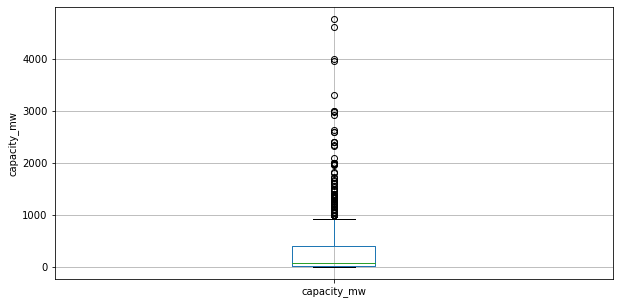

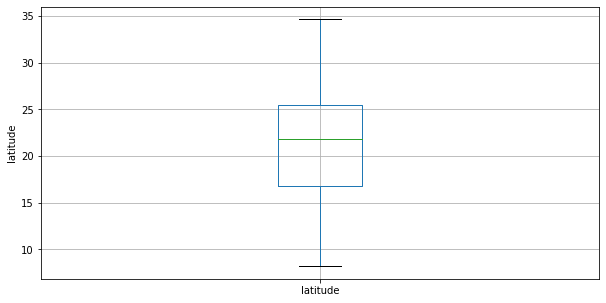

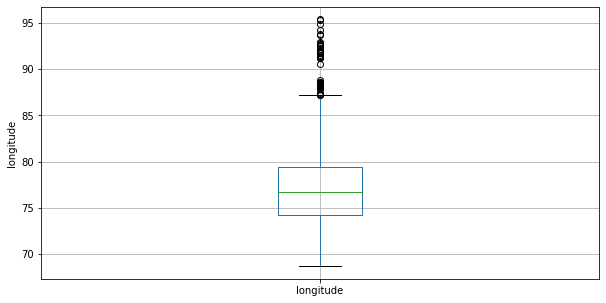

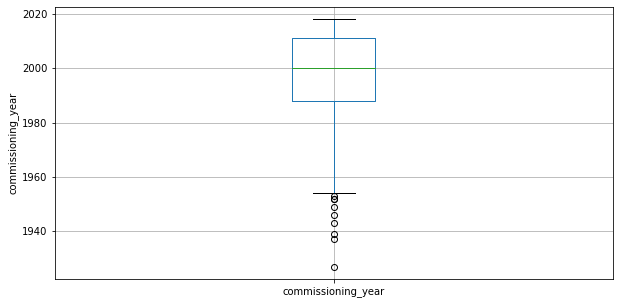

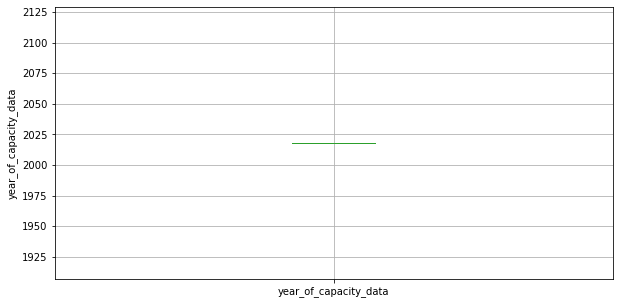

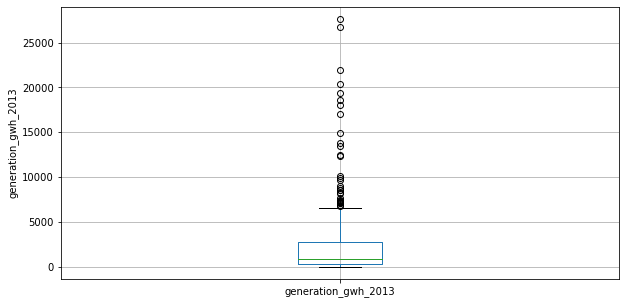

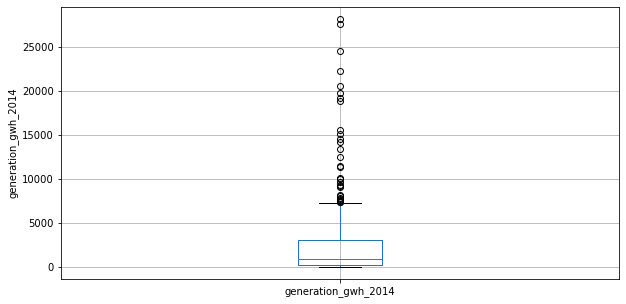

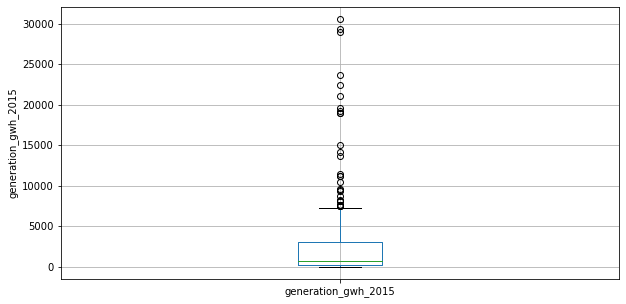

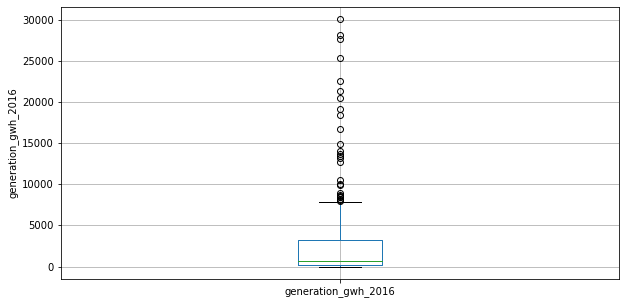

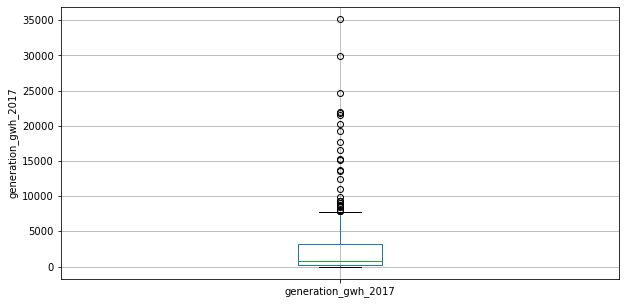

In [23]:
for i in boxplot_columns:
    plt.figure(figsize=(10,5))
    fig=df_num.boxplot(column=i)
    fig.set_ylabel(i)

In [24]:
# checking the value counts and unique values of few columns which has outliers 

print(df_num['longitude'].value_counts())
print(df_num['longitude'].unique())
print(df_num['commissioning_year'].value_counts())
print(df_num['commissioning_year'].unique())
print(df_num['generation_gwh_2013'].value_counts())
print(df_num['generation_gwh_2013'].unique())
print(df_num['generation_gwh_2014'].value_counts())
print(df_num['generation_gwh_2014'].unique())

71.6917    4
71.6918    3
75.8988    3
72.8983    3
81.2875    3
          ..
80.1264    1
76.1137    1
74.6447    1
86.0970    1
79.5748    1
Name: longitude, Length: 828, dtype: int64
[73.2407 74.609  69.3732 91.3602 82.4091 68.6447 77.0078 77.207  75.8863
 81.6373 77.9009 76.4938 82.8    77.8769     nan 82.7891 76.3188 81.7841
 81.7865 76.1851 74.7061 74.9191 79.5286 83.2741 79.1518 74.2402 76.3926
 77.687  73.6396 77.1893 76.3482 71.6917 71.6918 71.6916 80.2695 77.3066
 75.225  75.3155 76.1418 87.4513 82.1221 79.3421 74.689  82.4305 88.4042
 76.4695 81.2875 81.2747 74.2562 83.1889 91.565  86.0218 79.925  85.7452
 79.8066 73.2    80.2682 78.241  76.7986 74.5345 79.0547 74.8209 74.7111
 76.7909 77.1036 76.7195 75.6373 75.7131 76.4328 79.6311 79.7708 73.8087
 73.7252 73.4173 72.2222 77.758  77.8659 77.7145 74.7529 81.4237 73.3907
 73.3498 73.4527 75.8425 74.6216 78.1606 78.1336 73.0901 83.2058 76.6537
 81.0333 86.0888 85.88   90.5287 74.1543 76.3744 88.14   76.532  78.9535
 78.9333 76

# replacing the naan values of the columns with outliers with median 




In [25]:
df_num.head(2)

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
import numpy as np
for feature in df_num.columns:
    df_num[feature].fillna(df_num[feature].median(),inplace=True,axis=0)

In [27]:
df_num.isna().sum()  # NULL VALUES REMOVED 

capacity_mw              0
latitude                 0
longitude                0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

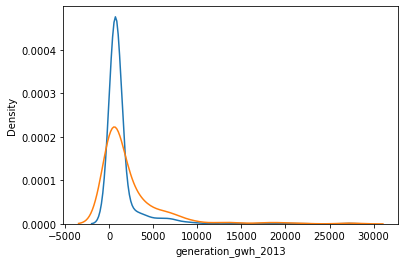

In [28]:
# checking the graph befor and after 


sns.kdeplot(data=df_num,x='generation_gwh_2013')
sns.kdeplot(data=df,x='generation_gwh_2013')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

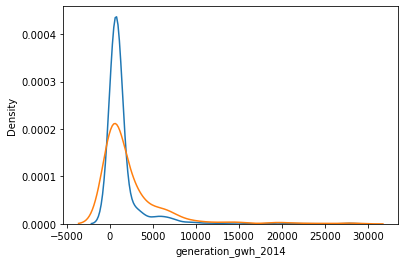

In [29]:
sns.kdeplot(data=df_num,x='generation_gwh_2014')
sns.kdeplot(data=df,x='generation_gwh_2014')

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

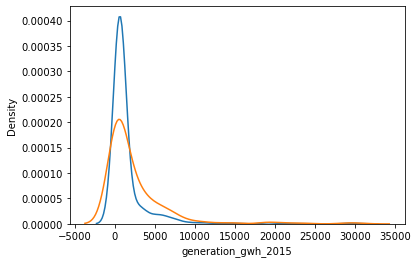

In [30]:
sns.kdeplot(data=df_num,x='generation_gwh_2015')
sns.kdeplot(data=df,x='generation_gwh_2015')

# combing the data after cleaning it 

In [31]:
df_cat.head(2)

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,Oil,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,Oil,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,Central Electricity Authority


In [32]:

# APPLYING LABEL ENCODER TO CHANGE CATEGORICAL DATA INTO NUMERIC SO WE CAN APPLY ALGORITHMS



from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = df_cat.columns


df_cat[cols] = df_cat[cols].apply(LabelEncoder().fit_transform)



df_cat.head()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_data_source
0,0,0,0,658,6,2,229,109,128,1,0
1,0,0,1,520,1,2,258,174,173,2,0
2,0,0,2,854,7,2,2,21,205,2,0
3,0,0,3,0,2,2,5,22,58,2,0
4,0,0,4,1,1,2,5,22,58,2,0


In [33]:
df_cat.shape

(908, 11)

In [34]:
df_num.head(2)

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,2018.0,797.063475,805.76,701.02725,716.72835,807.6017
1,98.0,24.7663,74.6090,2000.0,2018.0,797.063475,805.76,701.02725,716.72835,807.6017


In [35]:
df_num.shape

(908, 10)

In [37]:
# COMBINED DATA AFTER CLEANING THEM 



df_new=pd.concat([df_cat,df_num],axis=1)

In [38]:
df_new.head()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source,...,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,0,0,658,6,2,229,109,128,1,...,2.5,28.1839,73.2407,2011.0,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700
1,0,0,1,520,1,2,258,174,173,2,...,98.0,24.7663,74.6090,2000.0,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700
2,0,0,2,854,7,2,2,21,205,2,...,39.2,21.9038,69.3732,2000.0,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700
3,0,0,3,0,2,2,5,22,58,2,...,135.0,23.8712,91.3602,2004.0,2018.0,631.777928,617.789264,843.74700,886.004428,663.774500
4,0,0,4,1,1,2,5,22,58,2,...,1800.0,21.9603,82.4091,2015.0,2018.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736


In [39]:
df_new.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
primary_fuel              0
other_fuel1               0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_data_source    0
capacity_mw               0
latitude                  0
longitude                 0
commissioning_year        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
dtype: int64

# *classification problem 

In [40]:
x=df_new.drop('primary_fuel',axis=1)   # DIVIDING THE DATA FOR TRAIN AND TEST 
y=df_new['primary_fuel']

In [41]:
print(x.shape)
print(y.shape)

(908, 20)
(908,)


In [42]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [67]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 20)
(726,)
(182, 20)
(182,)


In [68]:
# applying standard scaler to make the data balance as it has values in diffrent units 


from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train,x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [70]:
dtc=DecisionTreeClassifier() # APPLYING DECISION TREE  AND CROSS VALIDATION AFTER THAT IN EVERY ALGORITHEM 

In [71]:
dtc.fit(x_train,y_train)
pdtc=dtc.predict(x_test)
print(accuracy_score(y_test,pdtc))
print(confusion_matrix(y_test,pdtc))

0.8021978021978022
[[ 6  0  0  0  0  0  0]
 [ 2 43  3  5  2  0  0]
 [ 1  3 10  6  1  0  0]
 [ 0  5  2 47  1  0  0]
 [ 0  1  3  0  1  0  0]
 [ 0  0  1  0  0 17  0]
 [ 0  0  0  0  0  0 22]]


In [72]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.66483516 0.7967033  0.84065934 0.7679558  0.7679558 ]
0.7676218808815494
0.05787146322328676


In [73]:
rfc=RandomForestClassifier()

In [74]:
rfc.fit(x_train,y_train)
prfc=rfc.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))

0.8406593406593407
[[ 6  0  0  0  0  0  0]
 [ 0 51  1  2  1  0  0]
 [ 2  7  5  6  1  0  0]
 [ 0  5  0 50  0  0  0]
 [ 0  2  2  0  1  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 22]]


In [75]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83516484 0.83516484 0.87362637 0.83425414 0.86187845]
0.8480177281282254
0.016539361487903893


In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pknn=knn.predict(x_test)
print(accuracy_score(y_test,pknn))
print(confusion_matrix(y_test,pknn))

0.7747252747252747
[[ 6  0  0  0  0  0  0  0]
 [ 7 42  1  5  0  0  0  0]
 [ 4  4  4  9  0  0  0  0]
 [ 0  3  1 50  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  1  0  2  0  0  0  0]
 [ 0  1  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0 22]]


In [77]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7032967  0.65934066 0.70879121 0.7679558  0.67955801]
0.7037884767166536
0.036620864611278885


In [78]:
# best model is random forest with the mean crossvalidation score of 84%

In [100]:
# saving the best model


import  pickle as pk
file=open('global_powerplant.pkl','wb')
pk.dump(prfc,file)

# * REGRESSION PROBLEM 

In [79]:
df_new.head()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,owner,source,url,geolocation_source,...,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,0,0,658,6,2,229,109,128,1,...,2.5,28.1839,73.2407,2011.0,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700
1,0,0,1,520,1,2,258,174,173,2,...,98.0,24.7663,74.6090,2000.0,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700
2,0,0,2,854,7,2,2,21,205,2,...,39.2,21.9038,69.3732,2000.0,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700
3,0,0,3,0,2,2,5,22,58,2,...,135.0,23.8712,91.3602,2004.0,2018.0,631.777928,617.789264,843.74700,886.004428,663.774500
4,0,0,4,1,1,2,5,22,58,2,...,1800.0,21.9603,82.4091,2015.0,2018.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736


In [80]:
y=df_new['capacity_mw']
x=df_new.drop('capacity_mw',axis=1)   # dividing the data keeping capacity_mw as target variable 

In [81]:
x.shape

(908, 20)

In [82]:
y.shape

(908,)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 20)
(726,)
(182, 20)
(182,)


In [85]:
sc=StandardScaler()
sc.fit(x_train,x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [86]:
from sklearn.linear_model import LinearRegression   # applying linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [87]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8009986721878789


In [88]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 145.04278354507875
MSE: 57839.42343062774
RMSE: 240.49828155441722


In [96]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78506691 0.80405792 0.77850198 0.79815816 0.85158539]
0.8034740729162371
0.02571275250626852


In [89]:
#applying the decision tree 

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [90]:
print(r2_score(y_test,pred))

0.7805548693030646


In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 117.7271868131868
MSE: 63781.38263556044
RMSE: 252.5497626915544


In [97]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.67412212 0.4714203  0.72497107 0.68309547 0.77398696]
0.6655191804243137
0.10330256354759372


In [101]:
# applying random forest 

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
predRDR=rdr.predict(x_test)

In [102]:
print(r2_score(y_test,predRDR))

0.8638426756494115


In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predRDR))
print('MSE:', metrics.mean_squared_error(y_test, predRDR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predRDR)))

MAE: 99.32997175824175
MSE: 39573.912510423615
RMSE: 198.9319293387153


In [104]:
score=cross_val_score(rdr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82033739 0.83397356 0.79752392 0.85681627 0.89856655]
0.8414435376055369
0.034437078835266324


#saving the best model 
RANDOM FOREST IS THE BEST MODEL WITH 85% ACCURACY 

In [105]:
# saving the best model


import  pickle as pk
file=open('GLOBAL_POWERPLANT_REGRESSION.pkl','wb')
pk.dump(predRDR,file)

# * CONCLUSION

THE PROBLEM STATEMENT HAD TWO PROBLEMS ,REGRESSION AND CLASSIFICATION BOTH 
NULL VALUES HAVE BEEN REMOVED 
ENCODING HAS BEEN APPLIED IN ORDER TO USE ALGORITHMS 
DATA HAVE BEEN SCALED FOR BETTER PERFORMANCE 
CROSS VALIDATION HAS BEEN USED 
RANDOM FOREST HAS PERFORMED THE BEST IN BOTH PROBLEMS AND HAVE BEEN SAVED 